In [1]:
import json

# Mở file json chứa nhãn dữ liệu huấn luyện
with open('D:/Study/Truc_quan_hoa_data/data_viet/vn_handwritten_images/labels.json', 'r', encoding='utf8') as f:
    train_labels = json.load(f)

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
print(train_labels['0015_samples.png'])

Phố 2, Huyện Bá Thước, Thanh Hoá


In [3]:
#find all characters in labels (so we don't blindly add chacters not even existed in our dataset)
char_list= set()
for label in train_labels.values():
    char_list.update(set(label))
char_list=sorted(char_list)
len(char_list)

140

In [5]:
# show all possible labels characters
"".join(char_list)

" #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ"

In [6]:
# convert the words to array of indexs based on the char_list
def encode_to_labels(txt):
    # encoding each output word into digits of indexes
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print("No found in char_list :", char)
        
    return dig_lst

In [7]:
encode_to_labels("Thỗn")

[40, 52, 121, 57]

In [8]:
import pathlib

train_image_paths = []

raw_folder_path = 'D:/Study/Truc_quan_hoa_data/data_viet/vn_handwritten_images/data'  

# Kiểm tra xem đường dẫn thực sự tồn tại
if pathlib.Path(raw_folder_path).exists():
    for item in pathlib.Path(raw_folder_path).glob('**/*'):
        if item.is_file() and item.suffix not in ['.json']:
            train_image_paths.append(str(item))
else:
    print("Thư mục không tồn tại hoặc đường dẫn không chính xác.")

In [9]:
print(len(train_image_paths))
train_image_paths[:10]

1838


['D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0000_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0001_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0002_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0003_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0004_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0005_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0006_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0007_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0008_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0009_samples.png']

In [11]:
import os
import pathlib
import json

# Giả sử 'RAW_FOLDER' là biến chứa đường dẫn đến thư mục chứa 'labels.json'
# Đảm bảo rằng đường dẫn này chính xác và không bị lặp lại
RAW_FOLDER = 'D:/Study/Truc_quan_hoa_data/data_viet/vn_handwritten_images/'  # Cập nhật đường dẫn này

# Đọc dữ liệu nhãn từ file labels.json
try:
    with open(os.path.join(RAW_FOLDER, 'labels.json'), 'r', encoding='utf8') as f:
        train_labels = json.load(f)
except FileNotFoundError:
    print("Tệp labels.json không tìm thấy. Hãy kiểm tra lại đường dẫn.")
except NotADirectoryError:
    print("Phần của đường dẫn được cung cấp không phải là một thư mục.")

# Tạo từ điển kết hợp đường dẫn tuyệt đối của tệp và nhãn
dict_filepath_label = {}
raw_data_path = pathlib.Path(RAW_FOLDER)
try:
    for item in raw_data_path.glob('**/*.*'):
        file_name = str(os.path.basename(item))
        # Bỏ qua file json chứa nhãn
        if file_name != "labels.json":
            label = train_labels.get(file_name, None)
            if label is not None:
                dict_filepath_label[str(item)] = label
except FileNotFoundError:
    print("Không tìm thấy thư mục hoặc tệp. Hãy kiểm tra lại đường dẫn.")

In [12]:
# Hiển thị 10 cặp đầu tiên từ dictionary
list_dict_filepath_label = list(dict_filepath_label.items())
first_10_pairs = list_dict_filepath_label[:10]

for path, label in first_10_pairs:
    print(f'Đường dẫn: {path}, Nhãn: {label}')

Đường dẫn: D:\Study\Truc_quan_hoa_data\data_viet\vn_handwritten_images\data\0000_samples.png, Nhãn: Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương
Đường dẫn: D:\Study\Truc_quan_hoa_data\data_viet\vn_handwritten_images\data\0001_samples.png, Nhãn: Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh
Đường dẫn: D:\Study\Truc_quan_hoa_data\data_viet\vn_handwritten_images\data\0002_samples.png, Nhãn: Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương
Đường dẫn: D:\Study\Truc_quan_hoa_data\data_viet\vn_handwritten_images\data\0003_samples.png, Nhãn: 42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh
Đường dẫn: D:\Study\Truc_quan_hoa_data\data_viet\vn_handwritten_images\data\0004_samples.png, Nhãn: 200 Phan Bội Châu, Phường Trường An, Thành phố Huế, Thừa Thiên - Huế
Đường dẫn: D:\Study\Truc_quan_hoa_data\data_viet\vn_handwritten_images\data\0005_samples.png, Nhãn: 27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ Chí Minh
Đường dẫn: D:\St

In [13]:
# find the maximum label length
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

max_label_len

69

In [14]:
all_image_paths = list(dict_filepath_label.keys())

In [15]:
all_image_paths[:10]

['D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0000_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0001_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0002_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0003_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0004_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0005_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0006_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0007_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0008_samples.png',
 'D:\\Study\\Truc_quan_hoa_data\\data_viet\\vn_handwritten_images\\data\\0009_samples.png']

In [16]:
import cv2
# find all widths and heights of images (this is useful if our dataset images got different sizes)
widths = []
heights = []
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)

In [17]:
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

In [18]:
# this information is useful for making decision for padding and resizing
(min_height, max_height, min_width, max_width)

(94, 376, 955, 2694)

In [19]:
# being a good Data Scientist, we need to have train set and test set
from sklearn.model_selection import train_test_split
test_size = 0.2
train_image_paths, val_image_paths = train_test_split(all_image_paths, test_size=test_size, random_state=42)

In [20]:
# Constants (we choose this number as we later discover that the output of our CNN is (1,9,512) from out input)
TIME_STEPS = 240

In [21]:
# BUILD THE PIPELINE FOR THE IMAGES, definitely this is super basic pipeline and can be improved

import numpy as np

# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
resize_max_width=0
i=0
for train_img_path in train_image_paths:
    # print(f_name)
    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    
    height, width = img.shape

    # in this dataset, we don't need to do any resize at all here.
    img = cv2.resize(img,(int(118/height*width),118))
    
    height, width = img.shape
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')
    
    # YOUR PART: Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # YOUR PART: Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    # add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[train_img_path]

    # split data into validation and training dataset as 10% and 90% respectively
    orig_txt.append(label)   
    train_label_length.append(len(label))

    # our time steps for valid input
    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    # convert words to digits based on charlist
    training_txt.append(encode_to_labels(label)) 
    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))
print(resize_max_width)

has processed trained 500 files
has processed trained 1000 files
2167


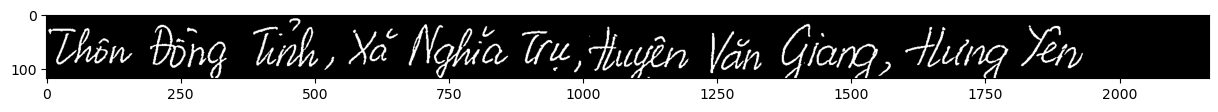

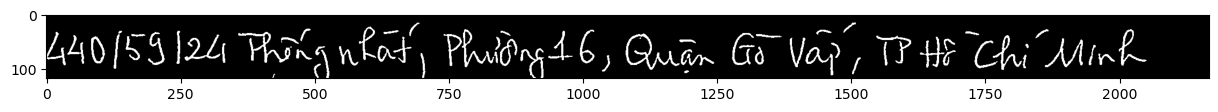

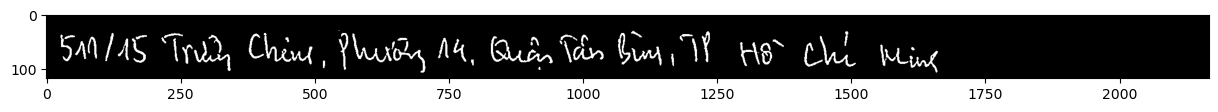

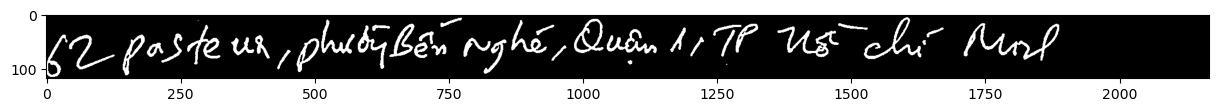

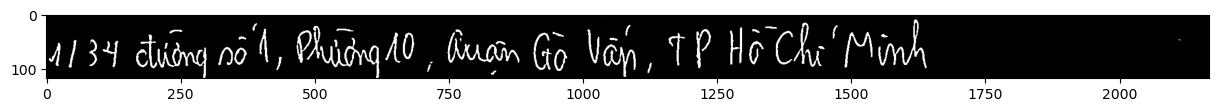

In [22]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap="gray")
    plt.show()

In [23]:
#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i=0

for val_img_path in val_image_paths:
    # print(f_name)
    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2GRAY)
    
    # in this dataset, we don't need to do any resize at all here.
    img = cv2.resize(img,(int(118/height*width),118))
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
        
    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')
    
    # YOUR PART: Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # YOUR PART: Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    # add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))

    # our time steps for valid input
    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    # convert words to digits based on charlist
    valid_txt.append(encode_to_labels(label))
    i+=1
    if (i%500 == 0):
        print ("has processed test {} files".format(i))
print(resize_max_width)

2167


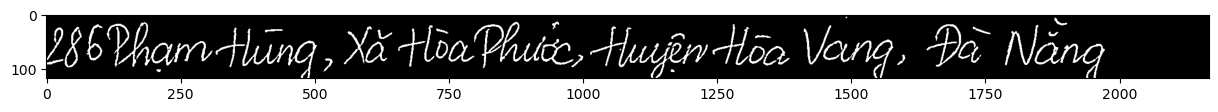

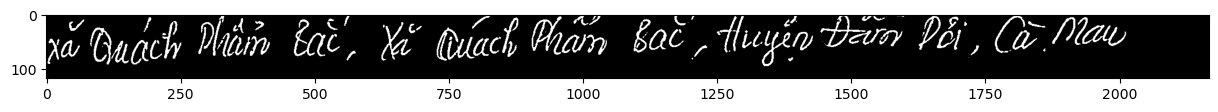

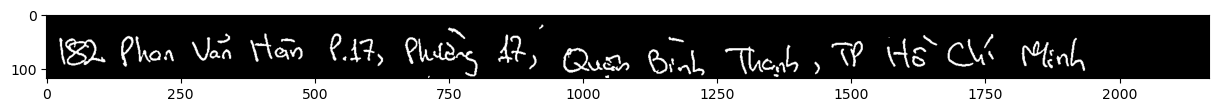

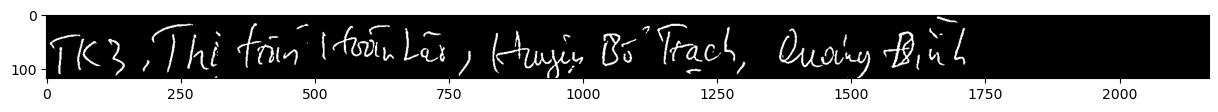

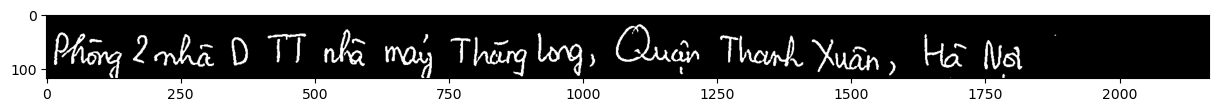

In [24]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(valid_img[i][:,:,0], cmap="gray")
    plt.show()

In [25]:
# this is the most controversial part when our max_label_len should be set different or slightly smaller than TIME_STEPS
# but let stick to the conventional/normal way: we should to be the same with our TIME_STEPS
max_label_len = TIME_STEPS 

In [26]:
# import padding library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad each output label to maximum text length, remember we did that so that we keep training with rnn consistent?
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0)
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0)

In [27]:
train_padded_txt[0]

array([ 40,  52,  84,  57,   0,  90, 119,  57,  51,   0,  40, 114,  57,
        52,   6,   0,  44,  76,   0,  34,  51,  52,  92,  46,   0,  40,
        61, 128,   6,   0,  28,  64,  68, 113,  57,   0,  42,  89,  57,
         0,  27,  53,  46,  57,  51,   6,   0,  28,  96,  57,  51,   0,
        45,  79,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [28]:
# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [29]:
# OUR FULL MODEL OF CRNN AND LSTM

# input with shape of height=32 and width=128 
inputs = Input(shape=(118,2167,1))
 
# Block 1
x = Conv2D(64, (3,3), padding='same')(inputs)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same')(x)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_3])
x = Activation('relu')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_5])
x = Activation('relu')(x)

# Block7
x = Conv2D(1024, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 1))(x)
x = Activation('relu')(x)

# pooling layer with kernel size (2,2) to make the height/2 #(1,9,512)
x = MaxPool2D(pool_size=(3, 1))(x)
 
# # to remove the first dimension of one: (1, 31, 512) to (31, 512) 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)
 
# # # bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

# # this is our softmax character proprobility with timesteps 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time

act_model = Model(inputs, outputs)

In [30]:
act_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 118, 2167, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 118, 2167, │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 39, 722,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 39, 722,   │          0 │ max_pooling2d[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 39, 722,   │     73,856 │ activation[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 13, 240,   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 13, 240,   │          0 │ max_pooling2d_1[… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 13, 240,   │    295,168 │ activation_1[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 240,   │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 13, 240,   │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 13, 240,   │    590,080 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 240,   │          0 │ batch_normalizat… │
│                     │ 256)              │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 13, 240,   │          0 │ add[0][0]         │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 13, 240,   │  1,180,160 │ activation_3[0][… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      2,048 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 13, 240,   │          0 │ batch_normalizat

 Total params: 21,965,197 (83.79 MB)

 Trainable params: 21,960,077 (83.77 MB)

 Non-trainable params: 5,120 (20.00 KB)

In [31]:
### ctc definition part 
"""
The reason why we use ctc_batch_cost instead of ctc_cost because
In batch cost, the program managed to mask out padded sequence using label_length, 
So the cost won't include the padding 0 section.
"""

"""
The way CTC is modelled currently in Keras is that you need to implement the loss function as a layer, you did that already (loss_out). 
Your problem is that the inputs you give that layer are not tensors from Theano/TensorFlow but numpy arrays.
To change that one option is to model these values as inputs to your model.
That is why we need to manually create Input for labels, input length and label_length.
"""

# define the label input shape for ctc
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')

"""
where input_length and label_length are constants you created previously
the easiest way here is to have a fixed batch size in training 
the lengths should have the same batch size (see shapes in the link for ctc_cost)   
"""

# define the length of input and label for ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
# define a ctc lambda function to take arguments and return ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    """
    labels: tensor (number of samples, max_string_length) containing the truth labels.
    y_pred: tensor (number of samples, time_steps, num_character_labels) containing the prediction, or output of the softmax.
    input_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_pred.
    label_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_true.
    """
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
# out loss function (just take the inputs and put it in our ctc_batch_cost)
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [41]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
import os

model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer='adam')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"
    ),
    ModelCheckpoint(
        filepath=os.path.join('.weights.h5'),
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1
    )
]

callbacks_list = callbacks


In [36]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 118, 2167, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 118, 2167, │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 39, 722,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 39, 722,   │          0 │ max_pooling2d[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 39, 722,   │     73,856 │ activation[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 13, 240,   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 13, 240,   │          0 │ max_pooling2d_1[… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 13, 240,   │    295,168 │ activation_1[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 240,   │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 13, 240,   │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 13, 240,   │    590,080 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 240,   │          0 │ batch_normalizat… │
│                     │ 256)              │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 13, 240,   │          0 │ add[0][0]         │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 13, 240,   │  1,180,160 │ activation_3[0][… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      2,048 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 13, 240,   │          0 │ batch_normalizat

 Total params: 21,965,197 (83.79 MB)

 Trainable params: 21,960,077 (83.77 MB)

 Non-trainable params: 5,120 (20.00 KB)

In [42]:
# notice I convert everything to numpy array here since model can fit either tensors and numpy array
# the reason why i stick with numpy array because it is simple to code and also because it is baseline solution
# I want to use openCV (can't run with tensors because it is CPU operations)
# And if I want to use tensors then i will make sure my image preprocessing functions uses tensor compatible operations

# ready our training data
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)  # all must be equal length to T timesteps
train_label_length = np.array(train_label_length)  # different length (only the same in Captcha dataset)

# ready our validating data
valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length) # all must be equal length to T timesteps
valid_label_length = np.array(valid_label_length) # different length (only the same in Captcha dataset)

In [ ]:
# choose batchsize and epochs

batch_size = 32
epochs = 50

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, callbacks = callbacks_list)

In [ ]:
act_model.load_weights('/kaggle/working/checkpoint_weights.hdf5')  # Đường dẫn đến file .h5

In [ ]:
# predict outputs on validation images
NO_PREDICTS = 100
OFFSET=0
# prediction = act_model.predict(valid_img[OFFSET:OFFSET+NO_PREDICTS])
prediction = act_model.predict(valid_img)

In [ ]:
# NO_PREDICTS image results
# 9 timesteps
# 32 chars + 1 blank
prediction.shape

In [ ]:
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

In [ ]:
#YOUR PART: WRITE TO PRINT OUT THE IMAGES IN NICE 2D ARRAY PLOT WITH ORIGINAL TEXT AND PREDICTED TEXT 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,200))
col=0
row=1
gs1 = gridspec.GridSpec(NO_PREDICTS, 1)
# gs1.update(wspace=0.025, hspace=0.025)
for n in range(NO_PREDICTS):
    plt.subplot(gs1[n])
    plt.imshow(valid_img[n][:,:,0], cmap="gray_r")
    plt.title(f"Label {n}: "+valid_orig_txt[n+OFFSET], fontsize=20, color="green")
    plt.xlabel(f"Prediction {n}: "+all_predictions[n+OFFSET], fontsize=20, color="red")

In [ ]:
!pip install editdistance

In [ ]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [ ]:
evaluate = ocr_metrics(predicts=all_predictions,
                                  ground_truth=valid_orig_txt,
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])

In [ ]:
print(e_corpus)